In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gdown
import torch
import yaml

from core.networks.conditional_unet1d import ConditionalUnet1D
from core.controllers.quadrotor_diffusion_policy import build_networks_from_config, build_noise_scheduler_from_config
from core.dataset.quadrotor_dataset import PlanarQuadrotorStateDataset
from core.trainers.quadrotor_diffusion_policy_trainer import PlanarQuadrotorDiffusionPolicyTrainer

## Load config

In [3]:
with open("config/config.yaml", "r") as file:
    config = yaml.safe_load(file)

## Download dataset

In [ ]:
dataset_path = "trn_data.joblib"
if not os.path.isfile(dataset_path):
    gdown.download(id="14safYt34YKn21vL9c_BsRHaG_URPB4Dp", output=dataset_path, quiet=False)

## Load dataset and instamntiate model

In [4]:
dataset = PlanarQuadrotorStateDataset(dataset_path=dataset_path, config=config)
print("Dataset loaded successfully.")

net = build_networks_from_config(config)
print("Networks initialized successfully.")

Dataset loaded successfully.
Networks initialized successfully.


## Instantiate the trainer

In [5]:
trainer = PlanarQuadrotorDiffusionPolicyTrainer(
    net=net,
    dataset=dataset,
    config=config,
)

## Start training

In [6]:
trainer.train(num_epochs=100, save_ckpt_epoch=50)
trainer.save_checkpoint("ckpt_final.ckpt")

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/383 [00:00<?, ?it/s]

Batch:   0%|          | 0/383 [00:00<?, ?it/s]

Batch:   0%|          | 0/383 [00:00<?, ?it/s]

Batch:   0%|          | 0/383 [00:00<?, ?it/s]

## Trainnig data visualization
The training data was generated using a MPPI-CBF controller from [shaoanlu/mppi_cbf](https://github.com/shaoanlu/mppi_cbf) repository. 

In [10]:
import joblib
import numpy as np
from matplotlib import pyplot as plt

In [8]:
def visualize_dataset(data):
    """
    Shows 20 smaples in the dataset.
    Each subplot illustrates a training trajectory consisting of:
    - The starting position as a green dot;
    - The goal position as a red dot;
    - The positon of the quadrotor is the blue line; and
    - The obstacles are presented as grey circles.
    """
    plt.figure(figsize=(10, 8))
    for i in range(20):
        rand_idx = np.random.randint(len(data["state"]))
        s = data["state"][rand_idx]
        des_s = data["desired_state"][rand_idx]
        info = data["info"][rand_idx]
        x, y = s[:, 0], s[:, 2]
        des_x, des_y = des_s[:, 0], des_s[:, 2]
    
        plt.subplot(4, 5, i+1)
        for obs_idx in range(len(info["obs_center"])):
            circle = plt.Circle((info["obs_center"][obs_idx, 0], info["obs_center"][obs_idx, 1]), info["obs_radius"][obs_idx], color='grey', fill=True, linestyle='--', linewidth=2, alpha=0.5)
            plt.gca().add_artist(circle)
        plt.scatter(data["state"][rand_idx][0, 0], data["state"][rand_idx][0, 2], color="green")
        plt.scatter(5, 5, color="red")
        plt.plot(x, y)
        # plt.plot(des_x, des_y, ":")
        plt.grid(); plt.xlim(-1, 7); plt.ylim(-1, 7)
    plt.tight_layout(); plt.show()

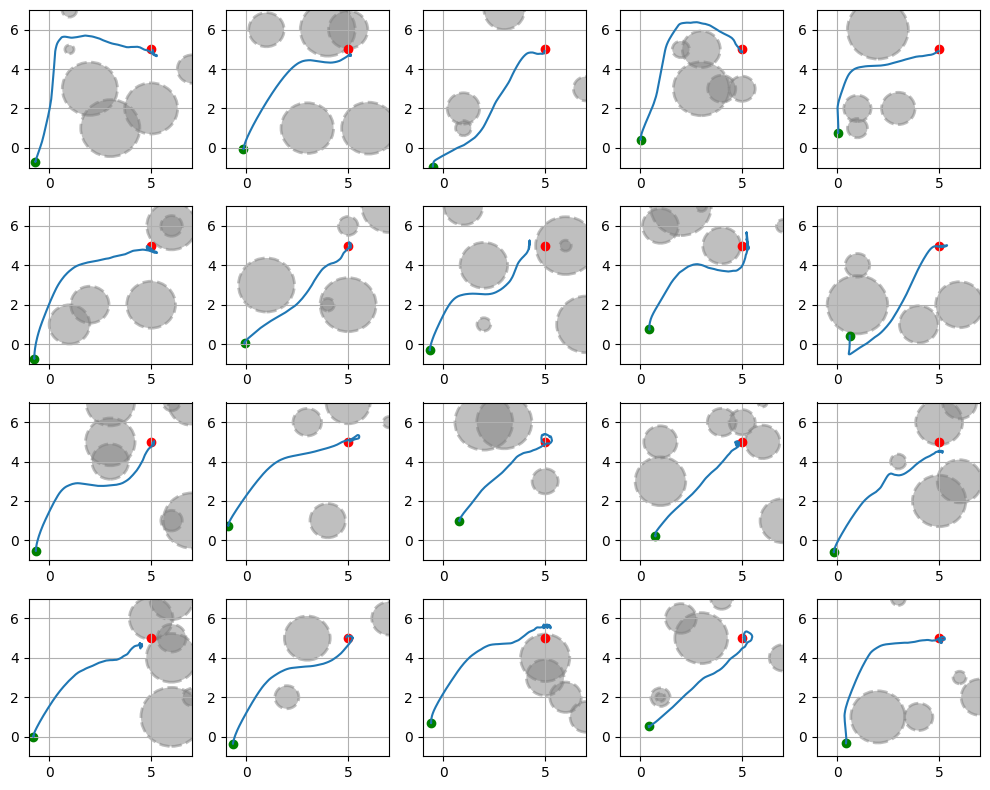

In [11]:
trn_data = joblib.load("trn_data6.joblib")
visualize_dataset(trn_data)